<a href="https://colab.research.google.com/github/VanTrung3007/AI/blob/main/DinhVanTrung-20146197-BTW3-fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bài Bồn Nước

62.46997955323023


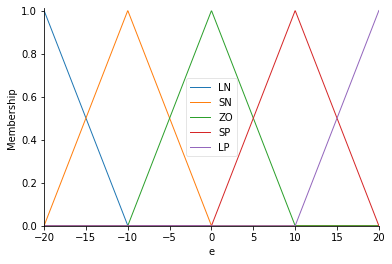

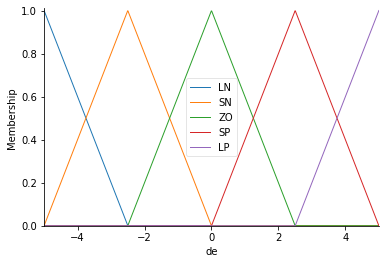

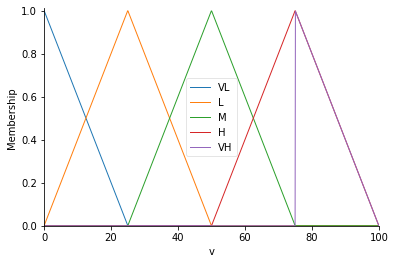

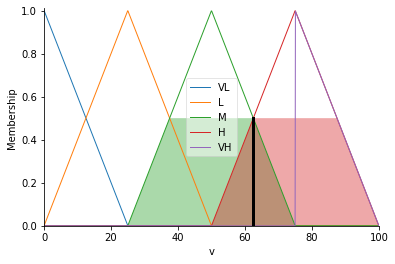

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Input
e  = ctrl.Antecedent(np.linspace(-20, 20, 1000), 'e') # errol
de = ctrl.Antecedent(np.linspace(-5, 5, 1000), 'de')  # d(errol)

# Output 
v = ctrl.Consequent(np.linspace(0, 100, 1000), 'v')

# Membership functions
e['LN'] = fuzz.trimf(e.universe,[-20, -20, -10])
e['SN'] = fuzz.trimf(e.universe,[-20, -10, 0])
e['ZO'] = fuzz.trimf(e.universe,[-10, 0, 10])
e['SP'] = fuzz.trimf(e.universe,[0, 10, 20])
e['LP'] = fuzz.trimf(e.universe,[10, 20, 20])

de['LN'] = fuzz.trimf(de.universe,[-5, -5, -2.5])
de['SN'] = fuzz.trimf(de.universe,[-5, -2.5, 0])
de['ZO'] = fuzz.trimf(de.universe,[-2.5, 0, 2.5])
de['SP'] = fuzz.trimf(de.universe,[0, 2.5, 5])
de['LP'] = fuzz.trimf(de.universe,[2.5, 5, 5])

v['VL'] = fuzz.trimf(v.universe,[ 0,  0,  25])
v['L']  = fuzz.trimf(v.universe,[ 0, 25,  50])
v['M']  = fuzz.trimf(v.universe,[25, 50,  75])
v['H']  = fuzz.trimf(v.universe,[50, 75, 100])
v['VH'] = fuzz.trimf(v.universe,[75, 75, 100])

# Rules
rule = []


rule.append(ctrl.Rule(e['LN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], v['M']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], v['M']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], v['L']))


rule.append(ctrl.Rule(e['ZO'] & de['LN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], v['M']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], v['VL']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], v['VL']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], v['VL']))


#Control system
valve_control = ctrl.ControlSystem(rule)
valve_simulation = ctrl.ControlSystemSimulation(valve_control)

e.view()
de.view()
v.view()


# Compute
valve_simulation.input['e'] = 5
valve_simulation.input['de'] = -2.5

valve_simulation.compute()

print(valve_simulation.output['v'])

# Valve
v.view(sim = valve_simulation)

Bài Nồi Cơm Điện

78.52083333333327


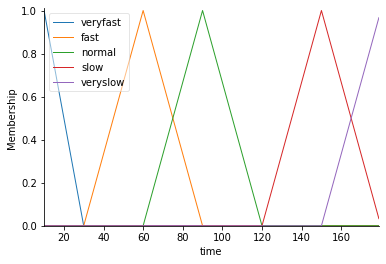

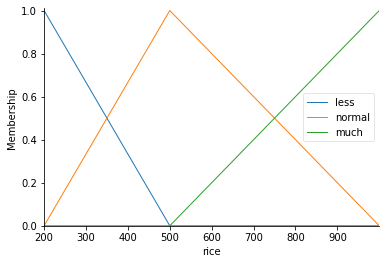

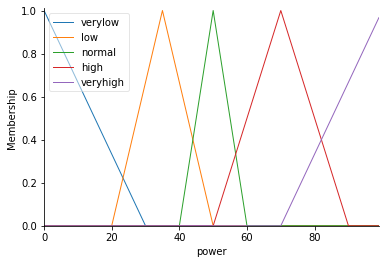

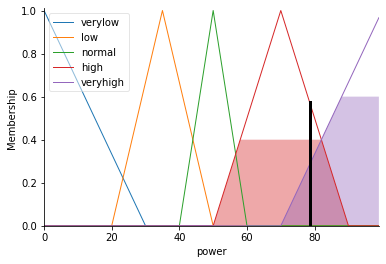

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Input
time = ctrl.Antecedent(np.arange(10,180,1), 'time')
rice = ctrl.Antecedent(np.arange(200,1000,1), 'rice')
#Output
power = ctrl.Consequent(np.arange(0,100,1), 'power')
# tao ham cho tung member
time['veryfast'] = fuzz.trimf(time.universe, [10,10,30])
time['fast'] = fuzz.trimf(time.universe, [30,60,90])
time['normal'] = fuzz.trimf(time.universe, [60,90,120])
time['slow'] = fuzz.trimf(time.universe, [120,150,180])
time['veryslow'] = fuzz.trimf(time.universe, [150,180,180])


rice['less'] = fuzz.trimf(rice.universe, [200,200,500])
rice['normal'] = fuzz.trimf(rice.universe, [200,500,1000])
rice['much'] = fuzz.trimf(rice.universe, [500,1000,1000])

power['verylow']= fuzz.trimf(power.universe,[0,0,30])
power['low']= fuzz.trimf(power.universe,[20,35,50])
power['normal']= fuzz.trimf(power.universe,[40,50,60])
power['high']= fuzz.trimf(power.universe,[50,70,90])
power['veryhigh']= fuzz.trimf(power.universe,[70,100,100])

rule = []

rule.append(ctrl.Rule(time['veryfast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['veryfast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['fast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['fast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['fast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['normal'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['normal'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['normal'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['slow'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['slow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['slow'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['veryslow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['veryslow'] & rice['much'], power['normal']))

#Control system
cooker_control = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_control)

time.view()
rice.view()
power.view()

# Compute
cooker_simulation.input['rice'] = 800
cooker_simulation.input['time'] = 60

cooker_simulation.compute()

print(cooker_simulation.output['power'])

# power
power.view(sim = cooker_simulation)

Bài Medical Diagnosis System

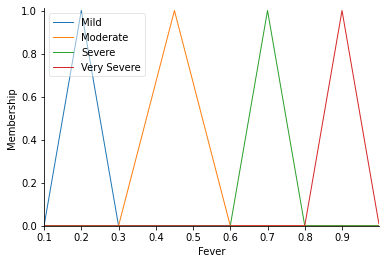

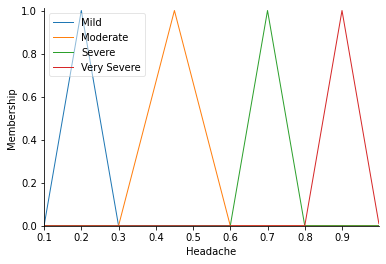

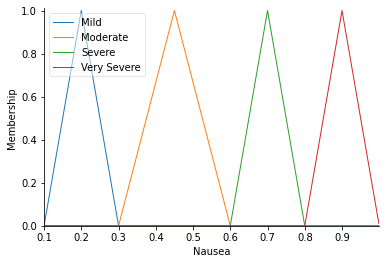

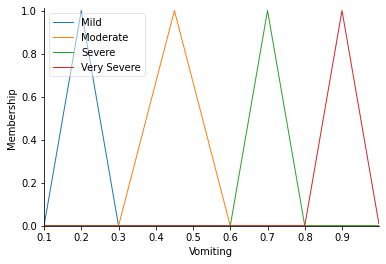

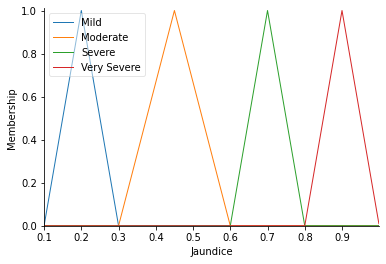

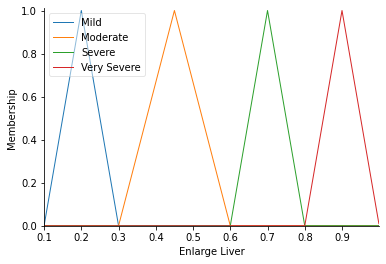

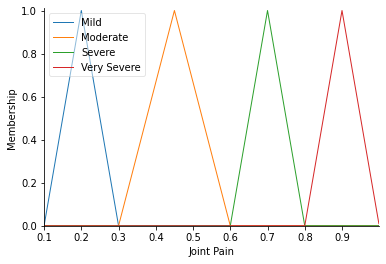

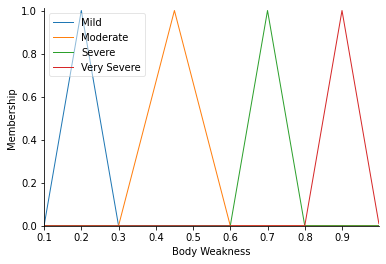

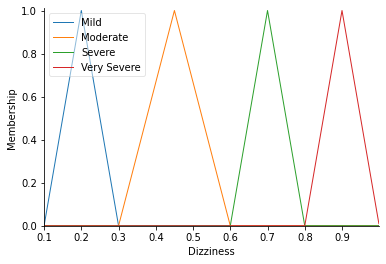

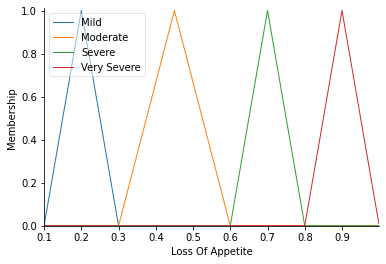

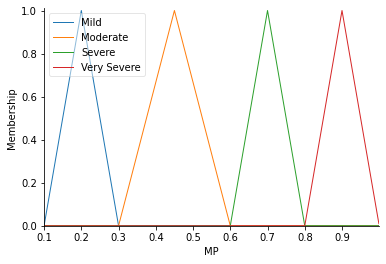

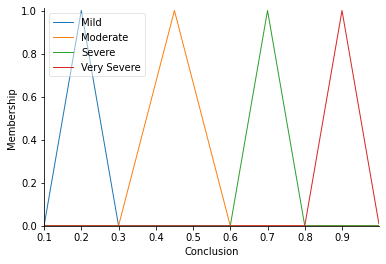

In [ ]:
from skfuzzy import membership
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fuzzyValues = np.arange(0.1, 1.0, 0.001)

# Inputs
fever          = ctrl.Antecedent(fuzzyValues, 'Fever')
headache       = ctrl.Antecedent(fuzzyValues, 'Headache')
nausea         = ctrl.Antecedent(fuzzyValues, 'Nausea')
vomiting       = ctrl.Antecedent(fuzzyValues, 'Vomiting')
jaundice       = ctrl.Antecedent(fuzzyValues, 'Jaundice')
enlargeLiver   = ctrl.Antecedent(fuzzyValues, 'Enlarge Liver')
jointPain      = ctrl.Antecedent(fuzzyValues, 'Joint Pain')
bodyWeakness   = ctrl.Antecedent(fuzzyValues, 'Body Weakness')
dizziness      = ctrl.Antecedent(fuzzyValues, 'Dizziness')
lossOfAppetite = ctrl.Antecedent(fuzzyValues, 'Loss Of Appetite')
MP             = ctrl.Antecedent(fuzzyValues, 'MP')

# Output
conclusion = ctrl.Consequent(fuzzyValues, 'Conclusion')

# Membership
def MembershipFunction(field):
    field['Mild']        = fuzz.trimf(fuzzyValues, [0.1, 0.2, 0.3])
    field['Moderate']    = fuzz.trimf(fuzzyValues, [0.3, 0.45, 0.6])
    field['Severe']      = fuzz.trimf(fuzzyValues, [0.6, 0.7, 0.8])
    field['Very Severe'] = fuzz.trimf(fuzzyValues, [0.8, 0.9, 1.0])
    
  
MembershipFunction(fever)
MembershipFunction(headache)
MembershipFunction(nausea)
MembershipFunction(vomiting)
MembershipFunction(jaundice)
MembershipFunction(enlargeLiver)
MembershipFunction(jointPain)
MembershipFunction(bodyWeakness)
MembershipFunction(dizziness)
MembershipFunction(lossOfAppetite)
MembershipFunction(MP)
MembershipFunction(conclusion)


dict_value = {1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Very Severe'}
rule = []

def MakeRule(i):
    f1  = dict_value[val_fever[i]]
    f2  = dict_value[val_headache[i]]
    f3  = dict_value[val_nausea[i]]
    f4  = dict_value[val_vomiting[i]]
    f5  = dict_value[val_jaundice[i]]
    f6  = dict_value[val_enlargeLiver[i]]
    f7  = dict_value[val_jointPain[i]]
    f8  = dict_value[val_bodyWeakness[i]]
    f9  = dict_value[val_dizziness[i]]
    f10 = dict_value[val_lossOfAppetite[i]]
    f11 = dict_value[val_MP[i]]

    c   = dict_value[con[i]]

    rule.append(ctrl.Rule(fever[f1] & headache[f2] & nausea[f3] &
        vomiting[f4] & jaundice[f5] & enlargeLiver[f6] & jointPain[f7] &
        bodyWeakness[f8] & dizziness[f9] & lossOfAppetite[f10] & MP[f11], conclusion[c] ))
    
val_fever          = [1,2,3,4,2,1,1,2,2,1,3,2,1,3,1,4,1,2,2,4]
val_headache       = [1,1,2,1,1,2,1,2,1,1,3,3,2,3,1,2,4,4,2,3]
val_nausea         = [1,1,1,1,1,2,2,2,2,2,3,2,2,2,1,1,2,4,2,3]
val_vomiting       = [1,1,1,1,2,1,2,2,2,2,3,3,2,3,2,2,2,1,2,3]
val_jaundice       = [1,1,1,1,1,1,1,2,1,1,3,2,1,3,1,3,1,3,1,3]
val_enlargeLiver   = [1,1,1,1,1,1,1,2,3,2,3,3,1,3,1,2,2,3,1,3]
val_jointPain      = [1,2,1,3,2,1,3,2,2,1,3,2,1,3,1,1,1,2,2,3]
val_bodyWeakness   = [1,2,3,3,2,1,3,2,2,1,4,3,2,3,3,4,2,3,2,3]
val_dizziness      = [3,3,3,1,2,2,2,2,3,1,3,2,1,2,1,3,4,4,2,3]
val_lossOfAppetite = [1,3,3,1,3,1,2,2,2,1,3,1,2,2,3,1,1,4,2,3]
val_MP             = [1,2,2,3,2,1,2,2,2,1,2,2,2,3,2,2,2,3,2,2]

con              = [1,2,3,4,2,1,3,2,2,1,4,3,2,3,3,4,4,4,2,4]

for i in range(20):
    MakeRule(i)
#Control system
conclusion_control = ctrl.ControlSystem(rule)
conclusion_simulation = ctrl.ControlSystemSimulation(conclusion_control)

fever.view()
headache.view()
nausea.view()
vomiting.view()
jaundice.view()
enlargeLiver.view()
jointPain.view()
bodyWeakness.view()
dizziness.view()
lossOfAppetite.view()
MP.view()
conclusion.view()

0.6996666068976939


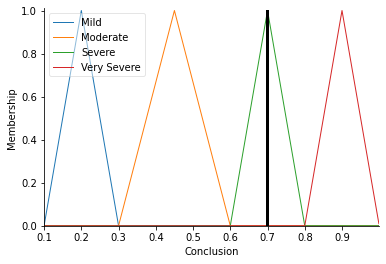

In [ ]:
# Compute
conclusion_simulation.inputs({'Fever': 0.8, 'Headache': 0.6, 'Nausea': 0.6, 
                               'Vomiting': 0.6, 'Jaundice': 0.65,'Enlarge Liver': 0.65,
                               'Joint Pain': 0.8, 'Body Weakness': 0.8, 'Dizziness': 0.6, 'Loss Of Appetite': 0.6, 'MP': 0.75})

conclusion_simulation.compute()
print(conclusion_simulation.output['Conclusion'])

# Conclusion
conclusion.view(sim = conclusion_simulation)

Bài Adaptive Food Suggestion Engine

In [96]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Input
taste = ctrl.Antecedent(np.arange(0,10,0.01), 'Taste')
environment = ctrl.Antecedent(np.arange(0,10,0.01), 'Environment')
budget = ctrl.Antecedent(np.arange(-4.5,4.5,0.01), 'Budget')
userreview = ctrl.Antecedent(np.arange(0,5,0.01), 'User Review')
location = ctrl.Antecedent(np.arange(0,3,0.001), 'Location')
#Output
preference = ctrl.Consequent(np.arange(0,15,0.01), 'Preference')
#Membership
taste['low'] = fuzz.gaussmf(np.arange(0,10,0.01),0,2)
taste['medium'] = fuzz.gaussmf(np.arange(0,10,0.01),5,2)
taste['high'] = fuzz.gaussmf(np.arange(0,10,0.01),10,2)

environment['low'] = fuzz.gaussmf(np.arange(0,10,0.01),0,2)
environment['medium'] = fuzz.gaussmf(np.arange(0,10,0.01),5,2)
environment['high'] = fuzz.gaussmf(np.arange(0,10,0.01),10,2)

budget['More Preferred'] = fuzz.gaussmf(np.arange(-4.5,4.5,0.01),-4.5,1)
budget['Preferred'] = fuzz.gaussmf(np.arange(-4.5,4.5,0.01),0,0.5)
budget['Less Preferred'] = fuzz.gaussmf(np.arange(-4.5,4.5,0.01),4.5,1)

userreview['More Preferred'] = fuzz.gaussmf(np.arange(0,5,0.01),0,0.75)
userreview['Preferred'] = fuzz.gaussmf(np.arange(0,5,0.01),2.5,0.45)
userreview['Less Preferred'] = fuzz.gaussmf(np.arange(0,5,0.01),5,0.75)

location['close level'] = fuzz.gaussmf(np.arange(0,3,0.001),0,0.3)
location['near level'] = fuzz.gaussmf(np.arange(0,3,0.001),1.5,0.15)
location['far level'] = fuzz.gaussmf(np.arange(0,3,0.001),3,0.3)

preference['level 1'] = fuzz.trimf(preference.universe,[0,1.5,3])
preference['level 2'] = fuzz.trimf(preference.universe,[3,4.5,6])
preference['level 3'] = fuzz.trimf(preference.universe,[6,7.5,9])
preference['level 4'] = fuzz.trimf(preference.universe,[9,10.5,12])
preference['level 5'] = fuzz.trimf(preference.universe,[12,13.5,15])


taste_value = {1: 'low', 2: 'medium', 3: 'high'}
environment_value = {1: 'low', 2: 'medium', 3: 'high'}
budget_value = {1: 'Less Preferred', 2: 'Preferred', 3: 'More Preferred'}
userreview_value = {1: 'Less Preferred', 2: 'Preferred', 3: 'More Preferred'}
location_value = {1: 'close level', 2: 'near level', 3: 'far level'}
preference_value = {1: 'level 1', 2: 'level 2', 3: 'level 3', 4: 'level 4',5: 'level 5'}
rule =[]
i=0
f=0
def MakeRule(i):
    f1  = taste_value[val_taste[a]]
    f2  = environment_value[val_environment[b]]
    f3  = budget_value[val_budget[c]]
    f4  = userreview_value[val_userreview[d]]
    f5  = location_value[value_location[e]]

    p  = preference_value[val_preference[f]]

    rule.append(ctrl.Rule(taste[f1] & environment[f2] & budget[f3] &
        userreview[f4] & location[f5] , preference[p] ))

val_taste             = [1,2,3]
val_environment       = [1,2,3]
val_budget            = [1,2,3]
val_userreview        = [1,2,3]
value_location        = [1,2,3]

val_preference        = [1,2,3,4,5]

for a in range(3):
    for b in range(3):
      for c in range(3):
        for d in range(3):
          for e in range(3):
              MakeRule(i)
              i += 1
              if((i%50)==0):
                f += 1

#Control system
pre_control = ctrl.ControlSystem(rule)
pre_simulation = ctrl.ControlSystemSimulation(pre_control)       

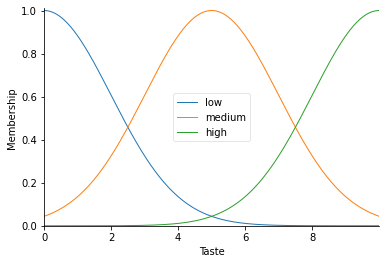

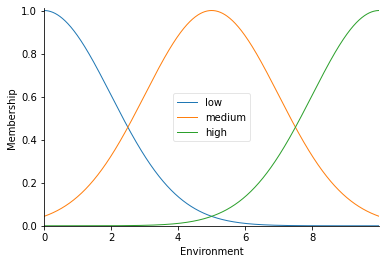

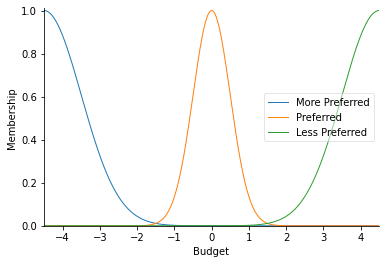

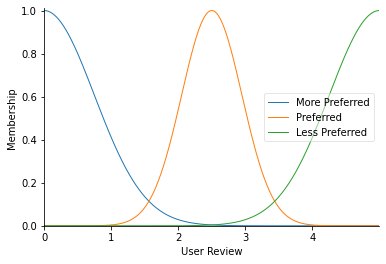

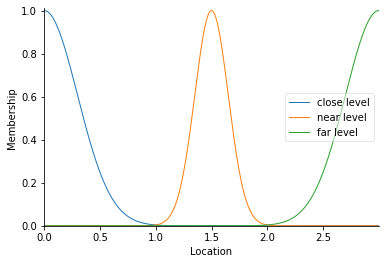

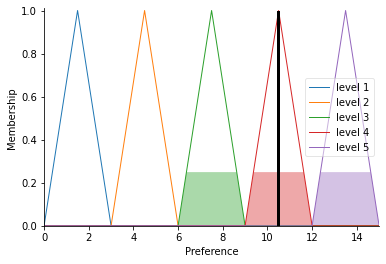

In [105]:
# Compute
pre_simulation.input['Taste'] = 8
pre_simulation.input['Environment'] = 2
pre_simulation.input['Budget'] = -4
pre_simulation.input['User Review'] = 1
pre_simulation.input['Location'] = 0.5

pre_simulation.compute()

taste.view()
environment.view()
budget.view()
userreview.view()
location.view()

# power
preference.view(sim = pre_simulation)